In [ ]:
# default_exp preprocessing.data


In [ ]:
# all_func


# Data

> Classes and functions to load dataset, clean and save for further processing & vocab creation.

In [20]:
# export
from peptide.basics import *

from collections import Counter
from abc import ABC, abstractmethod

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


## Analyze Data
- Load all 3 datasets
- Merge into single df?
- Look for class imbalance
- Clean
- Split

In [ ]:
DATA_STORE


'/Users/Vinod/.peptide/datasets'

In [ ]:
os.listdir(f"{DATA_STORE}")


['.DS_Store', 'dna_binding', 'amp', 'acp']

### Anti Cancer Peptide Dataset (ACP)

In [ ]:
os.listdir(f"{DATA_STORE}/acp")


['train_data.csv', 'test_data.csv']

In [ ]:
raw_acp_train_df = pd.read_csv(f"{DATA_STORE}/acp/train_data.csv")
raw_acp_test_df = pd.read_csv(f"{DATA_STORE}/acp/test_data.csv")


In [ ]:
for df in [raw_acp_train_df, raw_acp_test_df]:
    display(df.head(5))


,sequences,label
0,RRWWRRWRRW,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1


,sequences,label
0,FLPLLLSALPSFLCLVFKKC,0
1,DKLIGSCVWLAVNYTSNCNAECKRRGYKGGHCGSFLNVNCWCET,0
2,AVKDTYSCFIMRGKCRHECHDFEKPIGFCTKLNANCYM,0
3,GLPTCGETCFGGTCNTPGCTCDPWPVCTHN,1
4,ENCGRQAG,0


In [ ]:
for df in [raw_acp_train_df, raw_acp_test_df]:
    display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
label,1378.0,0.5,0.500182,0.0,0.0,0.5,1.0,1.0


,count,mean,std,min,25%,50%,75%,max
label,344.0,0.5,0.500728,0.0,0.0,0.5,1.0,1.0


In [ ]:
print(f"Train: {raw_acp_train_df.label.sum() / len(raw_acp_train_df) : .2%}")
print(f"Test: {raw_acp_test_df.label.sum() / len(raw_acp_test_df) : .2%}")


Train:  50.00%
Test:  50.00%


Class split is 50 - 50

In [ ]:
len(raw_acp_test_df) / (len(raw_acp_train_df) + len(raw_acp_test_df))


0.1997677119628339

Train / Test split in the total dataset 
- Test ~ 20%
- Train ~ 80%

In [ ]:
def get_acp_data():
    """Load, clean and return ACP train and test dataframes"""

    acp_train_df = pd.read_csv(f"{DATA_STORE}/acp/train_data.csv")
    acp_test_df = pd.read_csv(f"{DATA_STORE}/acp/test_data.csv")

    acp_train_df.rename(
        columns={"sequences": "sequence", "label": "label_acp"}, inplace=True
    )
    acp_test_df.rename(
        columns={"sequences": "sequence", "label": "label_acp"}, inplace=True
    )

    return acp_train_df, acp_test_df


### Antimicrobial Peptide Dataset (AMP)

In [ ]:
os.listdir(f"{DATA_STORE}/amp")


['all_data.csv']

In [ ]:
raw_amp_df = pd.read_csv(f"{DATA_STORE}/amp/all_data.csv")


In [ ]:
raw_amp_df.head(5)


,PDBs_code,SequenceID,label
0,AP02484,GMASKAGSVLGKITKIALGAL,1
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1
3,AP02983,FFGRLKAVFRGARQGWKEHRY,1
4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1


In [ ]:
raw_amp_df.describe().T


,count,mean,std,min,25%,50%,75%,max
label,4042.0,0.5,0.500062,0.0,0.0,0.5,1.0,1.0


In [ ]:
raw_amp_df.label.sum() / len(raw_amp_df)


0.5

- Class distribution is 50%
- Splitting into train (80%) and test (20%)

In [ ]:
def get_amp_data(test_pct=0.2, seed=1234):
    """Load, clean, split and return AMP train and test dataframes"""

    amp_df = pd.read_csv(f"{DATA_STORE}/amp/all_data.csv")

    amp_df.drop(columns=["PDBs_code"], inplace=True)
    amp_df.rename(
        columns={"SequenceID": "sequence", "label": "label_amp"}, inplace=True
    )

    amp_test_df = amp_df.sample(frac=test_pct, random_state=seed)
    amp_train_df = amp_df.drop(amp_test_df.index)

    return amp_train_df, amp_test_df


### DNA-Binding Protein Dataset

In [ ]:
os.listdir(f"{DATA_STORE}/dna_binding")


['test.csv', 'train.csv']

In [ ]:
raw_dnab_train_df = pd.read_csv(f"{DATA_STORE}/dna_binding/train.csv")
raw_dnab_test_df = pd.read_csv(f"{DATA_STORE}/dna_binding/test.csv")


In [ ]:
for df in [raw_dnab_train_df, raw_dnab_test_df]:
    display(df.head(5))


,code,sequence,label,origin
0,Q6A8L0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,Q7V7T9,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,Q9ZUP2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,Q2JVG1,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,Q9K4Q3,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


,code,sequence,label,origin
0,P27204|1,AKKRSRSRKRSASRKRSRSRKRSASKKSSKKHVRKALAAGMKNHLL...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,P53528|1,MVMVVNPLTAGLDDEQREAVLAPRGPVCVLAGAGTGKTRTITHRIA...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,P52684|1,MKDDINQEITFRKLSVFMMFMAKGNIARTAEAMKLSSVSVHRALHT...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,P10961|1,MNNAANTGTTNESNVSDAPRIEPLPSLNDDDIEKILQPNDIFTTDR...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,P06023|1,MAKPAKRIKSAAAAYVPQNRDAVITDIKRIGDLQREASRLETEMND...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [ ]:
for df in [raw_dnab_train_df, raw_dnab_test_df]:
    display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
label,14189.0,0.502431,0.500012,0.0,0.0,1.0,1.0,1.0


,count,mean,std,min,25%,50%,75%,max
label,2272.0,0.507482,0.500054,0.0,0.0,1.0,1.0,1.0


In [ ]:
print(f"Train: {raw_dnab_train_df.label.sum() / len(raw_dnab_train_df) : .2%}")
print(f"Test: {raw_dnab_test_df.label.sum() / len(raw_dnab_test_df) : .2%}")


Train:  50.24%
Test:  50.75%


Class split is 50 - 50

In [ ]:
len(raw_dnab_test_df) / (len(raw_dnab_train_df) + len(raw_dnab_test_df))


0.1380232063665634

Train / Test split in the total dataset 
- Test ~ 14%
- Train ~ 86%

In [ ]:
def get_dna_bind_data():
    """Load, clean and return ACP train and test dataframes"""

    dna_bind_train_df = pd.read_csv(f"{DATA_STORE}/dna_binding/train.csv")
    dna_bind_test_df = pd.read_csv(f"{DATA_STORE}/dna_binding/test.csv")

    dna_bind_train_df.drop(columns=["code", "origin"], inplace=True)
    dna_bind_test_df.drop(columns=["code", "origin"], inplace=True)

    dna_bind_train_df.rename(columns={"label": "label_dna_bind"}, inplace=True)
    dna_bind_test_df.rename(columns={"label": "label_dna_bind"}, inplace=True)

    return dna_bind_train_df, dna_bind_test_df

### Extract Features & Labels Function

In [ ]:
def extract_features_labels(df: pd.DataFrame, max_seq_len: int = None):
    """Extract features and separate labels"""

    df["sequence"] = df["sequence"].apply(lambda x: list(x))
    df["length"] = df["sequence"].apply(lambda x: len(x))

    features = pd.DataFrame(df["sequence"].to_list())
    if max_seq_len:
        features = features.loc[:, : max_seq_len - 1]

    label_cols = [lbl for lbl in df.columns if "label_" in lbl]
    labels = pd.DataFrame(df[label_cols])

    return df, features, labels

## Dataset Classes
Putting it all together

- Load, clean, split all 3 datasets
    - Clean = retain only 2 columns in all 3 dfs - `sequence` and `label`
    - Split AMP data set into train (80%) and test (20%)

In [56]:
# export


class ProteinDataset(ABC):
    """Abstract base class for prtein datasets"""

    def __init__(self, location: str, max_seq_len: int = None):
        self.location = location
        self.max_seq_len = max_seq_len

    @abstractmethod
    def clean_data(self):
        pass

    def extract_features_labels(
        self, df: pd.DataFrame
    ) -> tuple[pd.DataFrame, pd.DataFrame, np.array]:
        """Extract features and separate labels"""

        df["sequence"] = df["sequence"].apply(lambda x: list(x))
        df["length"] = df["sequence"].apply(lambda x: len(x))

        features = pd.DataFrame(df["sequence"].to_list())
        if self.max_seq_len:
            features = features.loc[:, : self.max_seq_len - 1]

        label_cols = [lbl for lbl in df.columns if "label" in lbl]
        labels = pd.DataFrame(df[label_cols])

        return df, features, np.ravel(labels.to_numpy())


In [57]:
# export


class ACPDataset(ProteinDataset):
    """Anticancer Peptide Dataset"""

    def __init__(self, location: str, max_seq_len: int = None):
        """Load, clean ,extract labels & features for ACP train and test"""
        super().__init__(location, max_seq_len)

        train_df, test_df = self.clean_data()
        self.train, self.X_train, self.y_train = self.extract_features_labels(train_df)
        self.test, self.X_test, self.y_test = self.extract_features_labels(test_df)

    def clean_data(self) -> tuple[pd.DataFrame, pd.DataFrame]:
        """Load, clean and return ACP train and test dataframes"""
        acp_train_df = pd.read_csv(f"{self.location}/acp/train_data.csv")
        acp_test_df = pd.read_csv(f"{self.location}/acp/test_data.csv")

        acp_train_df.rename(
            columns={"sequences": "sequence", "label": "label_acp"}, inplace=True
        )
        acp_test_df.rename(
            columns={"sequences": "sequence", "label": "label_acp"}, inplace=True
        )

        return acp_train_df, acp_test_df


In [58]:
# export


class AMPDataset(ProteinDataset):
    """Antimicrobial Peptide Dataset"""

    def __init__(
        self, location: str, max_seq_len: int = 150, test_pct: float = 0.2, seed=1234
    ):
        """Load, clean ,extract labels & features for AMP train and test"""
        super().__init__(location, max_seq_len)
        self.test_pct = test_pct
        self.seed = seed

        train_df, test_df = self.clean_data(self.test_pct, self.seed)
        self.train, self.X_train, self.y_train = self.extract_features_labels(train_df)
        self.test, self.X_test, self.y_test = self.extract_features_labels(test_df)

    def clean_data(
        self, test_pct: float = 0.2, seed: int = 1234
    ) -> tuple[pd.DataFrame, pd.DataFrame]:
        """Load, clean, split and return AMP train and test dataframes"""
        amp_df = pd.read_csv(f"{self.location}/amp/all_data.csv")

        amp_df.drop(columns=["PDBs_code"], inplace=True)
        amp_df.rename(
            columns={"SequenceID": "sequence", "label": "label_amp"}, inplace=True
        )

        amp_test_df = amp_df.sample(frac=test_pct, random_state=seed)
        amp_train_df = amp_df.drop(amp_test_df.index)

        amp_train_df.reset_index(inplace=True)
        amp_test_df.reset_index(inplace=True)

        return amp_train_df, amp_test_df


In [59]:
# export


class DNABindDataset(ProteinDataset):
    """DNA Binding Protein Dataset"""

    def __init__(self, location: str, max_seq_len: int = 300):
        """Load, clean ,extract labels & features for ACP train and test"""
        super().__init__(location, max_seq_len)

        train_df, test_df = self.clean_data()
        self.train, self.X_train, self.y_train = self.extract_features_labels(train_df)
        self.test, self.X_test, self.y_test = self.extract_features_labels(test_df)

    def clean_data(self) -> tuple[pd.DataFrame, pd.DataFrame]:
        """Load, clean and return DNABind train and test dataframes"""

        dna_bind_train_df = pd.read_csv(f"{self.location}/dna_binding/train.csv")
        dna_bind_test_df = pd.read_csv(f"{self.location}/dna_binding/test.csv")

        dna_bind_train_df.drop(columns=["code", "origin"], inplace=True)
        dna_bind_test_df.drop(columns=["code", "origin"], inplace=True)

        dna_bind_train_df.rename(columns={"label": "label_dna_bind"}, inplace=True)
        dna_bind_test_df.rename(columns={"label": "label_dna_bind"}, inplace=True)

        return dna_bind_train_df, dna_bind_test_df


In [60]:
acp_data = ACPDataset(DATA_STORE)
amp_data = AMPDataset(DATA_STORE)
dnabind_data = DNABindDataset(DATA_STORE)


In [61]:
dnabind_data.test


,sequence,label_dna_bind,length
0,"[A, K, K, R, S, R, S, R, K, R, S, A, S, R, K, ...",1,101
1,"[M, V, M, V, V, N, P, L, T, A, G, L, D, D, E, ...",1,714
2,"[M, K, D, D, I, N, Q, E, I, T, F, R, K, L, S, ...",1,308
3,"[M, N, N, A, A, N, T, G, T, T, N, E, S, N, V, ...",1,833
4,"[M, A, K, P, A, K, R, I, K, S, A, A, A, A, Y, ...",1,174
...,...,...,...
2267,"[M, N, F, S, R, E, R, T, I, T, E, I, Q, N, D, ...",0,125
2268,"[M, V, V, V, D, K, E, I, K, K, G, Q, Y, Y, L, ...",0,60
2269,"[M, N, P, S, T, H, V, S, S, N, G, P, T, T, P, ...",0,668
2270,"[M, V, R, S, G, K, K, A, V, V, L, A, A, V, A, ...",0,370


## EDA

In [35]:
def plot_seqlen_dist(df, dataset_name, log_scale=False, bins=75):
    """Plot the sequence length distribution given a train df with length and label columns"""
    len_col, label_col = df.columns
    mean = df[len_col].mean()
    median = df[len_col].median()
    sorted_by_len = df.sort_values(by=[len_col])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribution of sequence lengths in "train" - {dataset_name}')

    # overall dist with mean and median
    sns.histplot(
        data=sorted_by_len[len_col].values,
        kde=True,
        ax=ax1,
        log_scale=log_scale,
        bins=bins,
    )

    ax1.axvline(mean, color="r", label=f"Mean: {mean:.1f}")
    ax1.axvline(median, color="g", label=f"Median {median:.1f}")
    ax1.legend()

    # dist with labels
    sns.histplot(
        data=sorted_by_len,
        x=len_col,
        hue=label_col,
        kde=True,
        ax=ax2,
        log_scale=log_scale,
        bins=bins,
    )

    for ax in [ax1, ax2]:
        ax.set(xlabel="length")

    plt.show()


In [36]:
def plot_AA_dist(df, dataset_name):
    """Plot the distribution of amino acids given a train df with "sequence" column"""

    aa_counter = Counter()
    for seq in df.sequence:
        aa_counter.update(seq)
    print(f"Number of amino acids in the dataset: {len(aa_counter.keys())}")
    print(f"Frequencies: {aa_counter.most_common()}")
    AAs, counts = map(list, zip(*aa_counter.most_common()))  # to sort

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set(
        title=f'Frequency distribution of amino acids in {dataset_name} "train" dataset'
    )
    sns.barplot(x=AAs, y=counts, ax=ax)
    ax.set(xlabel="Amino Acids")

    plt.show()


### ACP

In [39]:
# df, features, labels = extract_features_labels(acp_train_df)


In [40]:
print(f"Samples in train: {len(acp_data.train)}")


Samples in train: 1378


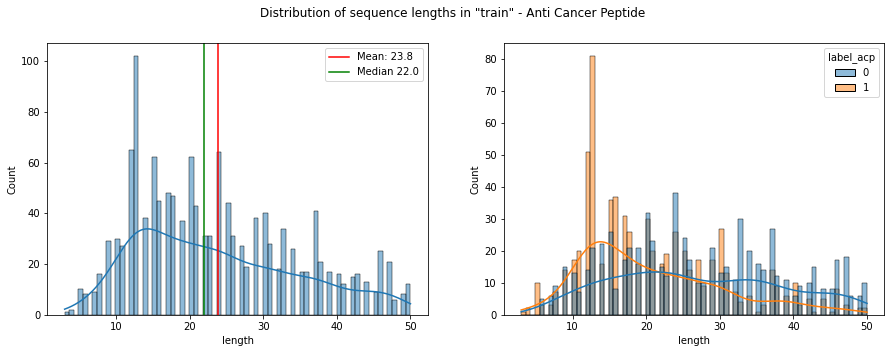

In [41]:
plot_seqlen_dist(acp_data.train[["length", "label_acp"]], "Anti Cancer Peptide")


Number of amino acids in the dataset: 20
Frequencies: [('K', 4141), ('L', 3397), ('G', 3153), ('A', 2825), ('C', 2251), ('I', 2029), ('R', 1810), ('V', 1739), ('S', 1699), ('F', 1535), ('T', 1309), ('P', 1236), ('N', 1119), ('E', 759), ('D', 731), ('Y', 693), ('Q', 690), ('W', 688), ('H', 646), ('M', 383)]


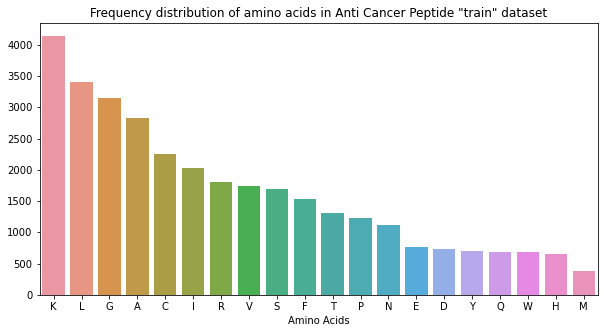

In [42]:
plot_AA_dist(acp_data.train[["sequence"]], "Anti Cancer Peptide")


### AMP

In [43]:
# df, features, labels = extract_features_labels(amp_train_df)


In [44]:
print(f"Samples in train: {len(amp_data.train)}")


Samples in train: 3234


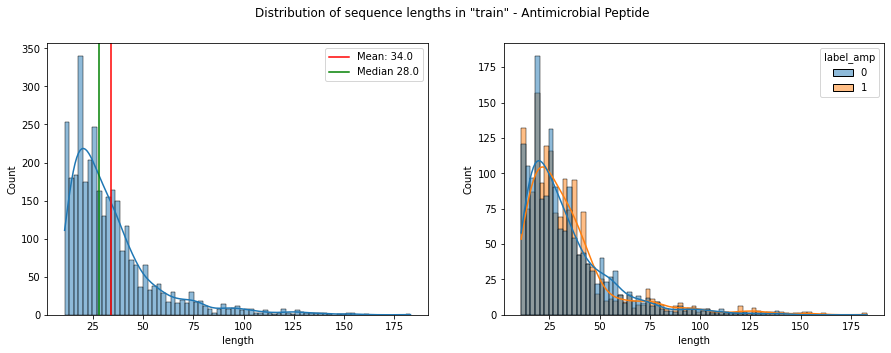

In [45]:
plot_seqlen_dist(
    amp_data.train[["length", "label_amp"]], "Antimicrobial Peptide", log_scale=False
)


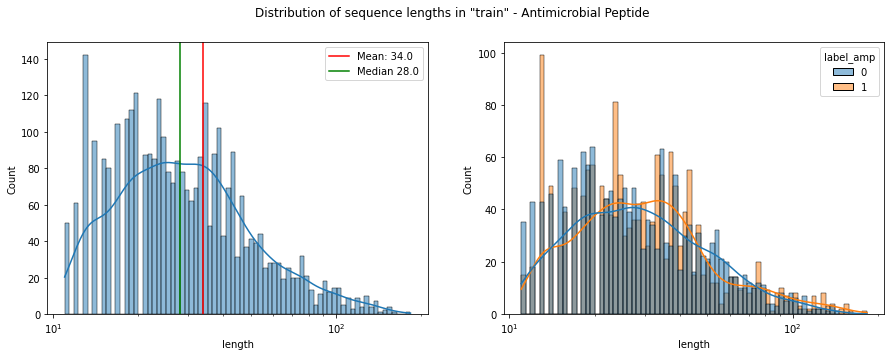

In [46]:
plot_seqlen_dist(
    amp_data.train[["length", "label_amp"]], "Antimicrobial Peptide", log_scale=True
)


Number of amino acids in the dataset: 21
Frequencies: [('L', 9768), ('G', 9521), ('K', 8835), ('A', 8356), ('S', 7371), ('V', 6703), ('R', 6491), ('I', 6294), ('E', 5366), ('P', 5338), ('T', 5233), ('D', 4651), ('N', 4613), ('F', 4392), ('C', 4219), ('Q', 3831), ('Y', 2962), ('H', 2618), ('M', 1830), ('W', 1578), ('X', 4)]


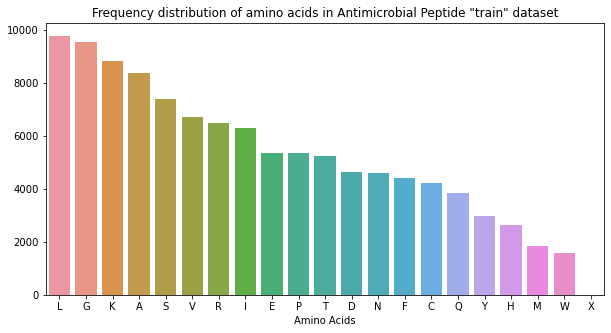

In [47]:
plot_AA_dist(amp_data.train[["sequence"]], "Antimicrobial Peptide")


### DNA Binding

In [48]:
# df, features, labels = extract_features_labels(dna_bind_train_df)


In [49]:
print(f"Samples in train: {len(dnabind_data.train)}")


Samples in train: 14189


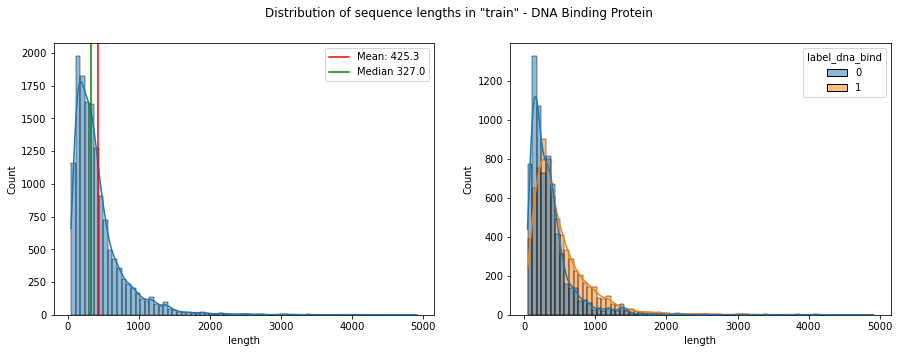

In [50]:
plot_seqlen_dist(
    dnabind_data.train[["length", "label_dna_bind"]],
    "DNA Binding Protein",
    log_scale=False,
)


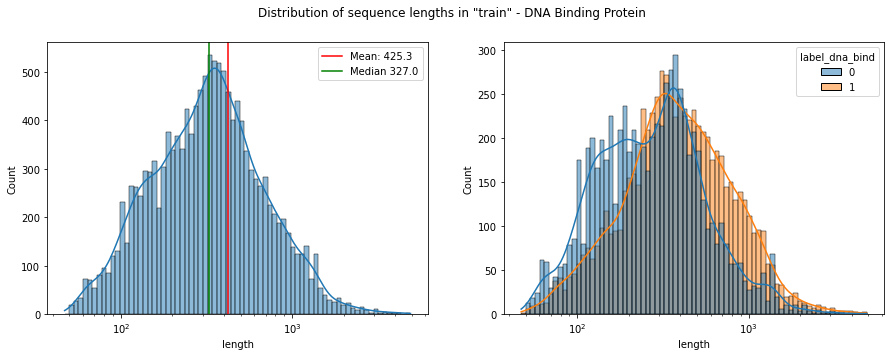

In [51]:
plot_seqlen_dist(
    dnabind_data.train[["length", "label_dna_bind"]],
    "DNA Binding Protein",
    log_scale=True,
)


Number of amino acids in the dataset: 24
Frequencies: [('L', 550524), ('S', 472593), ('A', 457288), ('E', 414062), ('G', 393279), ('K', 377806), ('V', 367475), ('R', 343987), ('T', 325286), ('P', 324499), ('D', 322736), ('I', 320614), ('Q', 272663), ('N', 271296), ('F', 215949), ('Y', 166668), ('H', 149670), ('M', 138056), ('C', 92015), ('W', 57815), ('X', 116), ('U', 3), ('O', 1), ('B', 1)]


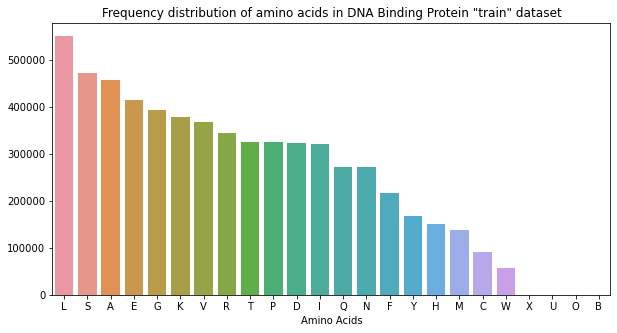

In [52]:
plot_AA_dist(dnabind_data.train[["sequence"]], "DNA Binding Protein")


## Export -

In [1]:
# hide
from nbdev.export import *

notebook2script()


Converted 00_basics.ipynb.
Converted 01_preprocessing_data.ipynb.
Converted 02_preprocessing_embedding.ipynb.
Converted 03_metrics.ipynb.
Converted 04_baseline_models.ipynb.
Converted 04_pretrained.ipynb.
Converted index.ipynb.
